### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME', 'SPECIAL_CONSIDERATIONS'], axis= 1)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning

app_type = application_df['APPLICATION_TYPE'].value_counts()
app_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

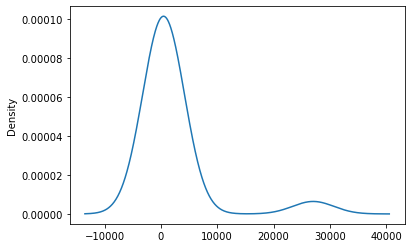

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_type.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace1 = list(app_type[app_type < 500].index)

# Replace in dataframe
for app in replace1:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_count = application_df['CLASSIFICATION'].value_counts()
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1370        1
C4500        1
C6100        1
C1236        1
C2380        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

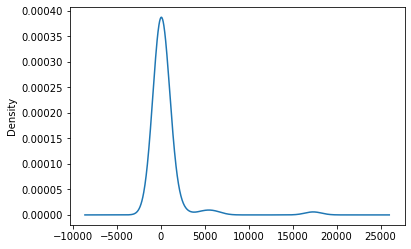

In [8]:
# Visualize the value counts of CLASSIFICATION
class_count.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace2 = list(class_count[class_count < 1800].index)

# Replace in dataframe
for cls in replace2:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
cat_var = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

cat_var

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[cat_var]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat_var)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(cat_var,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 30


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# hidden layer 3
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3360      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 6,751
Trainable params: 6,751
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint
import os

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)

checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=2,
    save_weights_only=True,
    period = 5)

# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=2000, callbacks=[cp_callback]) 

Epoch 1/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5694 - accuracy: 0.7250
Epoch 2/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5537 - accuracy: 0.7301
Epoch 3/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5518 - accuracy: 0.7320
Epoch 4/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5494 - accuracy: 0.7334
Epoch 5/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5484 - accuracy: 0.7350

Epoch 00005: saving model to checkpoints\weights.05.hdf5
Epoch 6/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5475 - accuracy: 0.7350
Epoch 7/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5468 - accuracy: 0.7359
Epoch 8/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5464 - accuracy: 0.7350
Epoch 9/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5452 - accuracy: 0.7365
Epoch 10/2000
804/804 [=

804/804 [==============================] - 1s 1ms/step - loss: 0.5349 - accuracy: 0.7413
Epoch 72/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5351 - accuracy: 0.7415
Epoch 73/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5349 - accuracy: 0.7408
Epoch 74/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5349 - accuracy: 0.7409
Epoch 75/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5346 - accuracy: 0.7420

Epoch 00075: saving model to checkpoints\weights.75.hdf5
Epoch 76/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5351 - accuracy: 0.7417
Epoch 77/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5345 - accuracy: 0.7418
Epoch 78/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5345 - accuracy: 0.7415
Epoch 79/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5343 - accuracy: 0.7419
Epoch 80/2000
804/804 [======

804/804 [==============================] - 1s 1ms/step - loss: 0.5330 - accuracy: 0.7427
Epoch 143/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5315 - accuracy: 0.7425
Epoch 144/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5321 - accuracy: 0.7432: 0s - loss: 0.5341 - accuracy: 
Epoch 145/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5312 - accuracy: 0.7423

Epoch 00145: saving model to checkpoints\weights.145.hdf5
Epoch 146/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5317 - accuracy: 0.7422
Epoch 147/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5316 - accuracy: 0.7429
Epoch 148/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5313 - accuracy: 0.7429
Epoch 149/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5311 - accuracy: 0.7425
Epoch 150/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5319 - accur

804/804 [==============================] - 1s 1ms/step - loss: 0.5307 - accuracy: 0.7422
Epoch 213/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5308 - accuracy: 0.7420
Epoch 214/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5302 - accuracy: 0.7424
Epoch 215/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5308 - accuracy: 0.7429

Epoch 00215: saving model to checkpoints\weights.215.hdf5
Epoch 216/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5311 - accuracy: 0.7425
Epoch 217/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5309 - accuracy: 0.7420
Epoch 218/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5304 - accuracy: 0.7426
Epoch 219/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.7425
Epoch 220/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5299 - accuracy: 0.7423

Epoch 00220: saving

Epoch 283/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5294 - accuracy: 0.7430
Epoch 284/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5294 - accuracy: 0.7430
Epoch 285/2000
804/804 [==============================] - 1s 2ms/step - loss: 0.5295 - accuracy: 0.7430

Epoch 00285: saving model to checkpoints\weights.285.hdf5
Epoch 286/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5291 - accuracy: 0.7433
Epoch 287/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5296 - accuracy: 0.7429
Epoch 288/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5293 - accuracy: 0.7432
Epoch 289/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5294 - accuracy: 0.7437
Epoch 290/2000
804/804 [==============================] - 2s 2ms/step - loss: 0.5296 - accuracy: 0.7431

Epoch 00290: saving model to checkpoints\weights.290.hdf5
Epoch 291/2000
804/804 [==========================

804/804 [==============================] - 1s 1ms/step - loss: 0.5292 - accuracy: 0.7433
Epoch 354/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5292 - accuracy: 0.7429
Epoch 355/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5289 - accuracy: 0.7437

Epoch 00355: saving model to checkpoints\weights.355.hdf5
Epoch 356/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5294 - accuracy: 0.7430
Epoch 357/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5378 - accuracy: 0.7424
Epoch 358/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5284 - accuracy: 0.7431
Epoch 359/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5285 - accuracy: 0.7431
Epoch 360/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5287 - accuracy: 0.7432

Epoch 00360: saving model to checkpoints\weights.360.hdf5
Epoch 361/2000
804/804 [==============================] - 1s 1ms/

Epoch 424/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5288 - accuracy: 0.7430
Epoch 425/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5289 - accuracy: 0.7430

Epoch 00425: saving model to checkpoints\weights.425.hdf5
Epoch 426/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5289 - accuracy: 0.7436
Epoch 427/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5289 - accuracy: 0.7437
Epoch 428/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5285 - accuracy: 0.7432
Epoch 429/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5299 - accuracy: 0.7432
Epoch 430/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5291 - accuracy: 0.7435

Epoch 00430: saving model to checkpoints\weights.430.hdf5
Epoch 431/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5286 - accuracy: 0.7434
Epoch 432/2000
804/804 [==========================

804/804 [==============================] - 1s 1ms/step - loss: 0.5307 - accuracy: 0.7433
Epoch 495/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5285 - accuracy: 0.7433

Epoch 00495: saving model to checkpoints\weights.495.hdf5
Epoch 496/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 0.7436
Epoch 497/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5279 - accuracy: 0.7432
Epoch 498/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5283 - accuracy: 0.7436
Epoch 499/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5285 - accuracy: 0.7428
Epoch 500/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5279 - accuracy: 0.7433

Epoch 00500: saving model to checkpoints\weights.500.hdf5
Epoch 501/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5280 - accuracy: 0.7434
Epoch 502/2000
804/804 [==============================] - 1s 1ms/

Epoch 565/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5281 - accuracy: 0.7440

Epoch 00565: saving model to checkpoints\weights.565.hdf5
Epoch 566/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5284 - accuracy: 0.7436
Epoch 567/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5281 - accuracy: 0.7441
Epoch 568/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5278 - accuracy: 0.7436
Epoch 569/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5280 - accuracy: 0.7439
Epoch 570/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5285 - accuracy: 0.7434

Epoch 00570: saving model to checkpoints\weights.570.hdf5
Epoch 571/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5285 - accuracy: 0.7430
Epoch 572/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5290 - accuracy: 0.7441
Epoch 573/2000
804/804 [==========================

804/804 [==============================] - 1s 1ms/step - loss: 0.5279 - accuracy: 0.7432: 0s

Epoch 00635: saving model to checkpoints\weights.635.hdf5
Epoch 636/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5280 - accuracy: 0.7441
Epoch 637/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5275 - accuracy: 0.7440
Epoch 638/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5277 - accuracy: 0.7439
Epoch 639/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5278 - accuracy: 0.7438
Epoch 640/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5295 - accuracy: 0.7442

Epoch 00640: saving model to checkpoints\weights.640.hdf5
Epoch 641/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 0.7432
Epoch 642/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5290 - accuracy: 0.7428
Epoch 643/2000
804/804 [==============================] - 1s 

804/804 [==============================] - 1s 1ms/step - loss: 0.5274 - accuracy: 0.7438

Epoch 00705: saving model to checkpoints\weights.705.hdf5
Epoch 706/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5278 - accuracy: 0.7439
Epoch 707/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5274 - accuracy: 0.7444
Epoch 708/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5275 - accuracy: 0.7433
Epoch 709/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5278 - accuracy: 0.7437
Epoch 710/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5276 - accuracy: 0.7439

Epoch 00710: saving model to checkpoints\weights.710.hdf5
Epoch 711/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5299 - accuracy: 0.7436
Epoch 712/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5348 - accuracy: 0.7438
Epoch 713/2000
804/804 [==============================] - 1s 1ms/


Epoch 00775: saving model to checkpoints\weights.775.hdf5
Epoch 776/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5274 - accuracy: 0.7445
Epoch 777/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5284 - accuracy: 0.7443
Epoch 778/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 0.7446
Epoch 779/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5272 - accuracy: 0.7444
Epoch 780/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5267 - accuracy: 0.7440

Epoch 00780: saving model to checkpoints\weights.780.hdf5
Epoch 781/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5273 - accuracy: 0.7439
Epoch 782/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5272 - accuracy: 0.7442
Epoch 783/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5266 - accuracy: 0.7436
Epoch 784/2000
804/804 [==========================

804/804 [==============================] - 1s 1ms/step - loss: 0.5268 - accuracy: 0.7441
Epoch 847/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5266 - accuracy: 0.7438
Epoch 848/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5279 - accuracy: 0.7444
Epoch 849/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5269 - accuracy: 0.7438
Epoch 850/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5268 - accuracy: 0.7444

Epoch 00850: saving model to checkpoints\weights.850.hdf5
Epoch 851/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5268 - accuracy: 0.7444
Epoch 852/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5288 - accuracy: 0.7435
Epoch 853/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5270 - accuracy: 0.7448
Epoch 854/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5268 - accuracy: 0.7442
Epoch 855/2000
804/8

Epoch 917/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5274 - accuracy: 0.7450
Epoch 918/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5277 - accuracy: 0.7445
Epoch 919/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5273 - accuracy: 0.7442
Epoch 920/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5270 - accuracy: 0.7443

Epoch 00920: saving model to checkpoints\weights.920.hdf5
Epoch 921/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5272 - accuracy: 0.7441
Epoch 922/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5269 - accuracy: 0.7444
Epoch 923/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5267 - accuracy: 0.7443
Epoch 924/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5266 - accuracy: 0.7444
Epoch 925/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5272 - accuracy: 0.7437

Epoc

804/804 [==============================] - 1s 1ms/step - loss: 0.5268 - accuracy: 0.7437
Epoch 988/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5281 - accuracy: 0.7446
Epoch 989/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5272 - accuracy: 0.7439: 0s - loss: 0.5
Epoch 990/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5275 - accuracy: 0.7435

Epoch 00990: saving model to checkpoints\weights.990.hdf5
Epoch 991/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5274 - accuracy: 0.7437
Epoch 992/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5269 - accuracy: 0.7437
Epoch 993/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5270 - accuracy: 0.7435
Epoch 994/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5272 - accuracy: 0.7439
Epoch 995/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5277 - accuracy: 0.7444

Epo

804/804 [==============================] - 1s 1ms/step - loss: 0.5269 - accuracy: 0.7442
Epoch 1057/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5261 - accuracy: 0.7442
Epoch 1058/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5265 - accuracy: 0.7444
Epoch 1059/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5269 - accuracy: 0.7447
Epoch 1060/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5264 - accuracy: 0.7446

Epoch 01060: saving model to checkpoints\weights.1060.hdf5
Epoch 1061/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5280 - accuracy: 0.7437
Epoch 1062/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5868 - accuracy: 0.7444
Epoch 1063/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5263 - accuracy: 0.7444
Epoch 1064/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5263 - accuracy: 0.7447
Epoch 1065/

804/804 [==============================] - 1s 1ms/step - loss: 0.5265 - accuracy: 0.7448
Epoch 1127/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5264 - accuracy: 0.7446
Epoch 1128/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5264 - accuracy: 0.7445
Epoch 1129/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5263 - accuracy: 0.7446
Epoch 1130/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5275 - accuracy: 0.7451

Epoch 01130: saving model to checkpoints\weights.1130.hdf5
Epoch 1131/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5263 - accuracy: 0.7451
Epoch 1132/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5269 - accuracy: 0.7444: 0s - loss: 0.5287 - accu
Epoch 1133/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5266 - accuracy: 0.7445
Epoch 1134/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5260 - ac

804/804 [==============================] - 1s 1ms/step - loss: 0.5287 - accuracy: 0.7446
Epoch 1197/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5262 - accuracy: 0.7451
Epoch 1198/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5267 - accuracy: 0.7451
Epoch 1199/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5262 - accuracy: 0.7449
Epoch 1200/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5268 - accuracy: 0.7445

Epoch 01200: saving model to checkpoints\weights.1200.hdf5
Epoch 1201/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5265 - accuracy: 0.7444
Epoch 1202/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5259 - accuracy: 0.7445
Epoch 1203/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5268 - accuracy: 0.7447
Epoch 1204/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5267 - accuracy: 0.7446
Epoch 1205/

804/804 [==============================] - 1s 1ms/step - loss: 0.5267 - accuracy: 0.7456
Epoch 1267/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5263 - accuracy: 0.7452
Epoch 1268/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5258 - accuracy: 0.7451
Epoch 1269/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5260 - accuracy: 0.7452
Epoch 1270/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5264 - accuracy: 0.7451

Epoch 01270: saving model to checkpoints\weights.1270.hdf5
Epoch 1271/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5285 - accuracy: 0.7444
Epoch 1272/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5259 - accuracy: 0.7451
Epoch 1273/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5262 - accuracy: 0.7451
Epoch 1274/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5261 - accuracy: 0.7454
Epoch 1275/

Epoch 1336/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5258 - accuracy: 0.7447
Epoch 1337/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5260 - accuracy: 0.7447
Epoch 1338/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5267 - accuracy: 0.7452
Epoch 1339/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5267 - accuracy: 0.7444
Epoch 1340/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5260 - accuracy: 0.7448

Epoch 01340: saving model to checkpoints\weights.1340.hdf5
Epoch 1341/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5292 - accuracy: 0.7447
Epoch 1342/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 0.7447
Epoch 1343/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5256 - accuracy: 0.7449
Epoch 1344/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5261 - accuracy: 0.

804/804 [==============================] - 1s 1ms/step - loss: 0.5254 - accuracy: 0.7453
Epoch 1407/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5270 - accuracy: 0.7454
Epoch 1408/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5269 - accuracy: 0.7454
Epoch 1409/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5266 - accuracy: 0.7449
Epoch 1410/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5277 - accuracy: 0.7450

Epoch 01410: saving model to checkpoints\weights.1410.hdf5
Epoch 1411/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5295 - accuracy: 0.7451
Epoch 1412/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5257 - accuracy: 0.7451
Epoch 1413/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5255 - accuracy: 0.7454
Epoch 1414/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5253 - accuracy: 0.7449
Epoch 1415/

804/804 [==============================] - 1s 1ms/step - loss: 0.5254 - accuracy: 0.7456
Epoch 1477/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5261 - accuracy: 0.7449
Epoch 1478/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5253 - accuracy: 0.7453
Epoch 1479/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5254 - accuracy: 0.7457
Epoch 1480/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5256 - accuracy: 0.7448

Epoch 01480: saving model to checkpoints\weights.1480.hdf5
Epoch 1481/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5257 - accuracy: 0.7452
Epoch 1482/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5260 - accuracy: 0.7448
Epoch 1483/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5257 - accuracy: 0.7451
Epoch 1484/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5257 - accuracy: 0.7446
Epoch 1485/

804/804 [==============================] - 1s 1ms/step - loss: 0.5254 - accuracy: 0.7450
Epoch 1547/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5255 - accuracy: 0.7449
Epoch 1548/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5261 - accuracy: 0.7448
Epoch 1549/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5256 - accuracy: 0.7453
Epoch 1550/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5259 - accuracy: 0.7451

Epoch 01550: saving model to checkpoints\weights.1550.hdf5
Epoch 1551/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5348 - accuracy: 0.7449
Epoch 1552/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5276 - accuracy: 0.7452
Epoch 1553/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5255 - accuracy: 0.7454
Epoch 1554/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5252 - accuracy: 0.7449
Epoch 1555/

804/804 [==============================] - 1s 1ms/step - loss: 0.5265 - accuracy: 0.7446
Epoch 1617/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5254 - accuracy: 0.7456
Epoch 1618/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5255 - accuracy: 0.7445
Epoch 1619/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5255 - accuracy: 0.7451
Epoch 1620/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5265 - accuracy: 0.7456

Epoch 01620: saving model to checkpoints\weights.1620.hdf5
Epoch 1621/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5260 - accuracy: 0.7446
Epoch 1622/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5259 - accuracy: 0.7451
Epoch 1623/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5251 - accuracy: 0.7448
Epoch 1624/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5258 - accuracy: 0.7449
Epoch 1625/

804/804 [==============================] - 1s 1ms/step - loss: 0.5253 - accuracy: 0.7455
Epoch 1687/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5264 - accuracy: 0.7449
Epoch 1688/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5272 - accuracy: 0.7444
Epoch 1689/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5254 - accuracy: 0.7446
Epoch 1690/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5267 - accuracy: 0.7453

Epoch 01690: saving model to checkpoints\weights.1690.hdf5
Epoch 1691/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5259 - accuracy: 0.7449
Epoch 1692/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5268 - accuracy: 0.7456
Epoch 1693/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5264 - accuracy: 0.7452
Epoch 1694/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5252 - accuracy: 0.7449
Epoch 1695/

804/804 [==============================] - 1s 1ms/step - loss: 0.5256 - accuracy: 0.7449
Epoch 1757/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5266 - accuracy: 0.7455
Epoch 1758/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5253 - accuracy: 0.7443
Epoch 1759/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5268 - accuracy: 0.7454
Epoch 1760/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5255 - accuracy: 0.7447

Epoch 01760: saving model to checkpoints\weights.1760.hdf5
Epoch 1761/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5256 - accuracy: 0.7454
Epoch 1762/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5262 - accuracy: 0.7450
Epoch 1763/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5257 - accuracy: 0.7449
Epoch 1764/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5256 - accuracy: 0.7443
Epoch 1765/

804/804 [==============================] - 1s 1ms/step - loss: 0.5261 - accuracy: 0.7448
Epoch 1827/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5258 - accuracy: 0.7451
Epoch 1828/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5257 - accuracy: 0.7449
Epoch 1829/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5254 - accuracy: 0.7456
Epoch 1830/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5254 - accuracy: 0.7453

Epoch 01830: saving model to checkpoints\weights.1830.hdf5
Epoch 1831/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5272 - accuracy: 0.7445
Epoch 1832/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5262 - accuracy: 0.7453
Epoch 1833/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5252 - accuracy: 0.7458
Epoch 1834/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5251 - accuracy: 0.7457
Epoch 1835/

804/804 [==============================] - 1s 1ms/step - loss: 0.5270 - accuracy: 0.7454
Epoch 1897/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5252 - accuracy: 0.7456
Epoch 1898/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5264 - accuracy: 0.7446
Epoch 1899/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5257 - accuracy: 0.7441
Epoch 1900/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5251 - accuracy: 0.7460

Epoch 01900: saving model to checkpoints\weights.1900.hdf5
Epoch 1901/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5253 - accuracy: 0.7459
Epoch 1902/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5257 - accuracy: 0.7453
Epoch 1903/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5253 - accuracy: 0.7462
Epoch 1904/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5252 - accuracy: 0.7454
Epoch 1905/

804/804 [==============================] - 1s 1ms/step - loss: 0.5256 - accuracy: 0.7446
Epoch 1967/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5256 - accuracy: 0.7451
Epoch 1968/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5259 - accuracy: 0.7439
Epoch 1969/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5307 - accuracy: 0.7447
Epoch 1970/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5250 - accuracy: 0.7453

Epoch 01970: saving model to checkpoints\weights.1970.hdf5
Epoch 1971/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5263 - accuracy: 0.7452
Epoch 1972/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5248 - accuracy: 0.7457
Epoch 1973/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5251 - accuracy: 0.7447
Epoch 1974/2000
804/804 [==============================] - 1s 1ms/step - loss: 0.5264 - accuracy: 0.7436
Epoch 1975/

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.9146 - accuracy: 0.7249
Loss: 0.9146427512168884, Accuracy: 0.7248979806900024


In [20]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")